In [4]:
x=['3','4']
y=['4','5']
z=set(x+y)
z

{'3', '4', '5'}

.. request is {'lang': 'en', 'sents': 'what time is it ?', 'engine': 'corenlp', 'pipelines': ['predicts']}
words count 5
✁ chunks. -------------------------
❶ aux_domains(be) it(pron)


,rel,index,text,lemma,children,features
0,cop,3,is,be,[is],"[c_aux, x_vbz]"


✁ dependency-graph. -------------------------


,index,text,lemma,upos,xpos
0,1,what,what,DET,WDT
1,2,time,time,NOUN,NN
2,3,is,be,AUX,VBZ
3,4,it,it,PRON,PRP
4,5,?,?,PUNCT,.


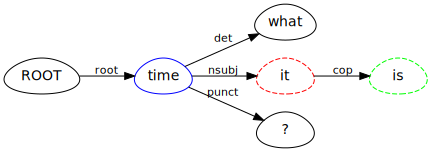

In [2]:
from sagas.nlu.uni_remote_viz import viz_sample
sents='what time is it ?'
dot=viz_sample('en', sents)
dot

In [3]:
import io_utils
io_utils.write_to_file('../out/sents.dot', dot.source)

.. request is {'lang': 'id', 'sents': 'Kucing saya besar.', 'engine': 'corenlp', 'pipelines': ['predicts']}
words count 4


,index,text,lemma,upos,xpos
0,1,Kucing,kucing,NOUN,NSD
1,2,saya,saya,PRON,PS1
2,3,besar,besar,ADJ,ASP
3,4,.,.,PUNCT,Z--


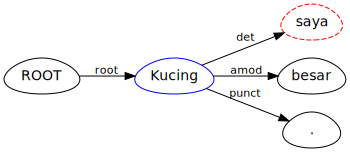

In [6]:
viz_sample('id', 'Kucing saya besar.')

.. request is {'lang': 'id', 'sents': 'Dia kaya.', 'engine': 'corenlp', 'pipelines': ['predicts']}
words count 3


,index,text,lemma,upos,xpos
0,1,Dia,dia,PRON,PS3
1,2,kaya,kaya,ADJ,ASP
2,3,.,.,PUNCT,Z--


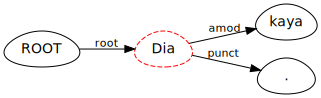

In [7]:
viz_sample('id', 'Dia kaya.')

.. request is {'lang': 'ru', 'sents': 'Он богатый.', 'engine': 'corenlp', 'pipelines': ['predicts']}
words count 3
❶ subj_domains(он) богатый(adj)


,rel,index,text,lemma,children,features
0,nsubj,1,Он,он,[Он],[c_pron]
1,punct,3,.,.,[.],[c_punct]


{'predicts': []}


,index,text,lemma,upos,xpos
0,1,Он,он,PRON,_
1,2,богатый,богатый,ADJ,_
2,3,.,.,PUNCT,_


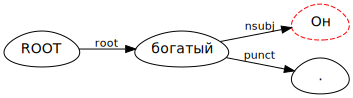

In [8]:
viz_sample('ru', 'Он богатый.')

.. request is {'lang': 'id', 'sents': 'Berapa umur kamu?', 'engine': 'corenlp', 'pipelines': ['predicts']}
words count 4


,index,text,lemma,upos,xpos
0,1,Berapa,berapa,DET,W--
1,2,umur,umur,NOUN,NSD
2,3,kamu,kamu,PRON,PS2
3,4,?,?,PUNCT,Z--


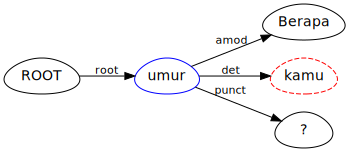

In [9]:
viz_sample('id', 'Berapa umur kamu?')

https://universaldependencies.org/u/dep/flat.html

(flat: flat multiword expression) 扁平MWE用平面结构注释，其中表达式中的所有后续单词使用flat标签附加到第一个单词。假设这些表达式没有任何内部句法结构，结构注释原则上是任意的。然而，在实践中，非常希望在所有语言中使用所有平坦MWE的一致注释。
不同语言（甚至是同一种语言）中语义上等效的表达式可能需要不同的分析，如果有时存在且有时没有规则的组合句法结构。

## 名称
在许多语言中，有多字专有名称，没有明确的内部句法结构，也没有明确的证据表明其中一个词是句法头。这些名称使用flat关系和可选子类型进行注释flat:name。
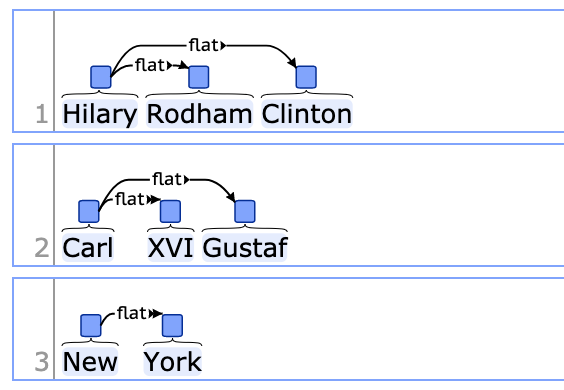

.. request is {'lang': 'id', 'sents': 'Umur Tini sepuluh tahun.', 'engine': 'corenlp', 'pipelines': ['predicts']}
words count 5


,index,text,lemma,upos,xpos
0,1,Umur,umur,PROPN,NSD
1,2,Tini,tini,PROPN,VSA
2,3,sepuluh,sepuluh,NUM,CC-
3,4,tahun,tahun,NOUN,NSD
4,5,.,.,PUNCT,Z--


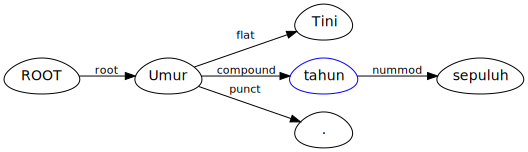

In [10]:
viz_sample('id', 'Umur Tini sepuluh tahun.')

In [37]:
from sagas.nlu.corenlp_parser import get_chunks
from sagas.nlu.uni_remote import dep_parse
from sagas.tool.misc import color_print, rs_represent

def rules(sents, lang='en', engine='corenlp'):
    pipelines=['predicts']
    doc_jsonify, resp = dep_parse(sents, lang, engine, pipelines)
    if doc_jsonify is not None:
        color_print('cyan', resp)
        if len(resp['predicts'])>0:
            rs_represent(resp['predicts'], data = {'lang': lang, "sents": sents, 'engine': engine,
                                 'pipelines':pipelines})
        else:
            rs = get_chunks(doc_jsonify)
            if len(rs)>0:
                # rs_summary(rs)
                rs_represent(rs, data = {'lang': lang, "sents": sents, 'engine': engine,
                                         'pipelines':pipelines})
            else:
                color_print('red', '.. no found predefined chunk-patterns.')
                print(doc_jsonify.words_string())
                print(doc_jsonify.dependencies_string())
    return doc_jsonify
                
# rules 'Berapa umur kamu?' id
# en="How old are you?"
sent_p=rules('Berapa umur kamu?', 'id')

.. request is {'lang': 'id', 'sents': 'Berapa umur kamu?', 'engine': 'corenlp', 'pipelines': ['predicts']}
words count 4
{'predicts': []}
.. no found predefined chunk-patterns.
<JsonifyWordImpl index=1;text=Berapa;lemma=berapa;upos=DET;xpos=W--;feats=PronType=Int;governor=2;dependency_relation=amod>
<JsonifyWordImpl index=2;text=umur;lemma=umur;upos=NOUN;xpos=NSD;feats=Number=Sing;governor=0;dependency_relation=root>
<JsonifyWordImpl index=3;text=kamu;lemma=kamu;upos=PRON;xpos=PS2;feats=Number=Sing|Person=2|Polite=Infm|PronType=Prs;governor=2;dependency_relation=det>
<JsonifyWordImpl index=4;text=?;lemma=?;upos=PUNCT;xpos=Z--;feats=_;governor=2;dependency_relation=punct>
('Berapa', '2', 'amod')
('umur', 0, 'root')
('kamu', '2', 'det')
('?', '2', 'punct')


In [44]:
from sagas.nlu.corenlp_parser import add_domain

root=next(w for w in sent_p.words if w.dependency_relation=='root')
print(root.index, root.text, root.upos)
root_idx=int(root.index)
domains = []
stems = []
rs = []
for word in (w for w in sent_p.words if w.governor==root_idx):
    print(f"{word.dependency_relation}: {word.text}")
    add_domain(domains, stems, word, sent_p)

word=root
rs.append({'type':'verb_domains', 'subj': word.text, 'lemma':word.lemma,
           'upos':word.upos.lower(), 'xpos':word.xpos.lower(),
           'rel': word.dependency_relation, 'governor': word.governor,   
           'index': word.index, 'domains': domains, 'stems':stems})
rs

2 umur NOUN
amod: Berapa
det: kamu
punct: ?


[{'type': 'verb_domains',
  'subj': 'umur',
  'lemma': 'umur',
  'upos': 'noun',
  'xpos': 'nsd',
  'rel': 'root',
  'governor': 0,
  'index': '2',
  'domains': [('amod',
    '1',
    'Berapa',
    'berapa',
    ['Berapa'],
    ['c_det', 'x_w--']),
   ('det', '3', 'kamu', 'kamu', ['kamu'], ['c_pron', 'x_ps2']),
   ('punct', '4', '?', '?', ['?'], ['c_punct', 'x_z--'])],
  'stems': [('amod', ['berapa']), ('det', ['kamu']), ('punct', ['?'])]}]

In [46]:
lang='id'
sents='Berapa umur kamu?'
engine='corenlp'
pipelines=['predicts']

rs_represent(rs, data = {'lang': lang, "sents": sents, 'engine': engine, 'pipelines':pipelines})

❶ [verb] umur 2 (root, 0)
+----+-------+---------+--------+---------+------------+------------------+
|    | rel   |   index | text   | lemma   | children   | features         |
|----+-------+---------+--------+---------+------------+------------------|
|  0 | amod  |       1 | Berapa | berapa  | Berapa..   | c_det, x_w--..   |
|  1 | det   |       3 | kamu   | kamu    | kamu..     | c_pron, x_ps2..  |
|  2 | punct |       4 | ?      | ?       | ?..        | c_punct, x_z--.. |
+----+-------+---------+--------+---------+------------+------------------+
♥ umur([verb]): old.a.01, age.n.01, class...


(['♥ umur([verb]): old.a.01, age.n.01, class...'],
 [     rel index    text   lemma  children          features
  0   amod     1  Berapa  berapa  Berapa..    c_det, x_w--..
  1    det     3    kamu    kamu    kamu..   c_pron, x_ps2..
  2  punct     4       ?       ?       ?..  c_punct, x_z--..])

In [50]:
from sagas.nlu.inspectors import NegativeWordInspector as negative
from sagas.nlu.inspectors import DateInspector as dateins
from sagas.nlu.inspectors import EntityInspector as entins
from sagas.nlu.inspector_wordnet import PredicateWordInspector as kindof
from sagas.nlu.inspector_wordnet import VerbInspector as behaveof
from sagas.nlu.inspector_rasa import RasaInspector as intentof

from sagas.nlu.patterns import Patterns, print_result
agency=['c_pron', 'c_noun', 'c_propn']

def id_patterns(meta, domains):
    pats=[Patterns(domains, meta, 1).verb(nsubj=agency, obj=agency),
          Patterns(domains, meta, 5).verb(behaveof('age', 'n'), amod='c_det'),
          ]
    print_result(pats)
lang_specs={'id':id_patterns}

def rs_repr(rs, data):
    for serial, r in enumerate(rs):
        common = {'lemma': r['lemma'], 'stems': r['stems']}
        meta = {'rel': r['rel'], **common, **data}
        lang=data['lang']
        if lang in lang_specs:
            lang_specs[lang](meta, r['domains'])
        else:
            print(f'no special patterns for lang {lang}')

rs_repr(rs, data = {'lang': lang, "sents": sents, 'engine': engine, 'pipelines':pipelines})

✔ [verb with pos is behave_of(age,n): True, amod is c_det: True]


In [76]:
from sagas.nlu.ruleset import result_df
def display_result_df(rs, presenter='jupyter'):
    df = result_df(rs)
    if presenter == 'jupyter':
        from IPython.display import display
        display(df)
    else:
        print(df)

In [65]:
import importlib
import sagas.tool.loggers
import sagas.nlu.ruleset
importlib.reload(sagas.tool.loggers)
importlib.reload(sagas.nlu.ruleset)

<module 'sagas.nlu.ruleset' from '/Users/xiaofeiwu/jcloud/assets/langs/workspace/rasa/stack/sagas/nlu/ruleset.py'>

In [102]:
from sagas.nlu.corenlp_parser import get_chunks
from sagas.nlu.uni_remote import dep_parse
from sagas.nlu.inspector_fixtures import InspectorFixture

fixture=InspectorFixture()

def get_domains(sents, lang, engine='corenlp', enable_predicts=False):
    pipelines=['predicts'] if enable_predicts else []
    doc_jsonify, resp = dep_parse(sents, lang, engine, pipelines)
    if doc_jsonify is not None:
        color_print('cyan', resp)
        result_set=[]
        if resp is not None and 'predicts' in resp and len(resp['predicts'])>0:
            rs=resp['predicts']
            # print(rs)
        else:
            rs = get_chunks(doc_jsonify)
        if len(rs)>0:            
            # rs_represent(rs, data = {'lang': lang, "sents": sents, 'engine': engine,
            #                         'pipelines':pipelines})
            data = {'lang': lang, "sents": sents, 'engine': engine,
                                     'pipelines':pipelines}
            for r in rs:
                # fixture.print_table(r, False)
                # print(f"{r['lemma']} ({r['phonetic']}, {r['word']})")
                print(f"lemma: {r['lemma']}")
                df = sagas.to_df(r['domains'], ['rel', 'index', 'text', 'lemma', 'children', 'features'])
                display(df)
                domains = r['domains']
                common = {'lemma': r['lemma'], 'stems': r['stems']}
                meta = {'rel': r['rel'], **common, **data}
                result_set.append((domains, meta))
        else:
            color_print('red', '.. no found predefined chunk-patterns.')
            print(doc_jsonify.words_string())
            print(doc_jsonify.dependencies_string())
        return result_set

lang='id'
sents='Berapa umur kamu?'
engine='corenlp'
# get_domains(sents, lang, engine)
get_domains('你有几台笔记本电脑？', 'zh', 'ltp')

.. request is {'lang': 'zh', 'sents': '你有几台笔记本电脑？', 'engine': 'ltp', 'pipelines': []}
words count 7
None
lemma: 有


,rel,index,text,lemma,children,features
0,sbv,1,你,你,[你],"[c_pron, x_r]"
1,vob,6,电脑,电脑,"[几, 台, 笔记本, 电脑]","[c_noun, x_n]"
2,wp,7,？,？,[？],"[c_punct, x_wp]"


[([('sbv', 1, '你', '你', ['你'], ['c_pron', 'x_r']),
   ('vob', 6, '电脑', '电脑', ['几', '台', '笔记本', '电脑'], ['c_noun', 'x_n']),
   ('wp', 7, '？', '？', ['？'], ['c_punct', 'x_wp'])],
  {'rel': 'hed',
   'lemma': '有',
   'stems': [('sbv', ['你']), ('vob', ['几', '台', '笔记本', '电脑']), ('wp', ['？'])],
   'lang': 'zh',
   'sents': '你有几台笔记本电脑？',
   'engine': 'ltp',
   'pipelines': []})]

In [83]:
get_domains('你有几台笔记本电脑？', 'zh', 'ltp', True)

.. request is {'lang': 'zh', 'sents': '你有几台笔记本电脑？', 'engine': 'ltp', 'pipelines': ['predicts']}
words count 7
{'predicts': [{'type': 'predicate', 'lemma': '有', 'index': 1, 'phonetic': 'you', 'word': '有', 'rel': 'hed', 'governor': 0, 'domains': [['a0', 0, '你', '你', ['你'], ['c_pron', 'x_r']], ['a1', 5, '电脑', '电脑', ['几', '台', '笔记本', '电脑'], ['c_noun', 'x_n']]], 'stems': []}]}


,rel,index,text,lemma,children,features
0,a0,0,你,你,[你],"[c_pron, x_r]"
1,a1,5,电脑,电脑,"[几, 台, 笔记本, 电脑]","[c_noun, x_n]"


[([['a0', 0, '你', '你', ['你'], ['c_pron', 'x_r']],
   ['a1', 5, '电脑', '电脑', ['几', '台', '笔记本', '电脑'], ['c_noun', 'x_n']]],
  {'rel': 'hed',
   'lemma': '有',
   'stems': [],
   'lang': 'zh',
   'sents': '你有几台笔记本电脑？',
   'engine': 'ltp',
   'pipelines': ['predicts']})]

In [103]:
from sagas.nlu.ruleset import RuleSet, RuleSets, actions_vob, agency
from termcolor import colored

class Keeper:
    def callback(self, t):
        pass

class BaseMeta(object):
    @classmethod
    def setup(meta, cls):
        def _(self, text, lang='en'):
            print(type(self).__name__,
                  isinstance(self, Keeper),
                  text, lang)
            # data = {'lang': lang, "sents": text, 'engine': 'corenlp', 'disable_predicts': False}
            # domains, meta = self.request_domains(data)
            engine='ltp' if lang=='zh' else 'corenlp'
            domain_set=get_domains(text, lang, engine)
            for domains, meta in domain_set:
                # print(f"{meta['lemma']} ({meta['phonetic']}, {meta['word']})")
                # print(f"{meta['lemma']}")
                # execute rulesets
                print('rules', [r.name for r in self.rulesets])
                for i, ruleset in enumerate(self.rulesets):
                    print(colored(f"✁ {i}. {'-' * 25}", 'cyan'))
                    rule_rs = ruleset(domains, meta, self)
                    display_result_df(rule_rs)
                              
            if isinstance(self, Keeper):
                return self.callback(text)
            return None

        cls._ = _
                                  
class StoremanMeta(type):
    def __init__(cls, clsname, superclasses, attributedict):
        ruleset_stats = RuleSet('how_many_artifact_c',
                        rules=lambda d, m: [
                            # $ sz '你有几台笔记本电脑？'
                            Patterns(d, m, 5).verb(behaveof('have', 'v'), __engine='ltp', vob=intentof('how_many', 0.75)),
                            *actions_vob(d, m, [('have', 'device/artifact'), ]),
                        ],
                        executor=lambda obj: color_print('red', f'.. object: {obj}'))
        cls.rulesets = [ruleset_stats]
        BaseMeta.setup(cls)     

class Storeman(Keeper, metaclass=StoremanMeta):
    def __init__(self, name):
        self.name=name

    def callback(self, t):
        print(f'** {self.name} callback', t)
        return self
    
    def __repr__(self):
        return f"♡{self.name}♡"
    
a = Storeman("tom")
b = Storeman("kite")
a._('你有几台笔记本电脑？', 'zh')
# a._('done.')
# b._('done.').callback('direct')

Storeman True 你有几台笔记本电脑？ zh
.. request is {'lang': 'zh', 'sents': '你有几台笔记本电脑？', 'engine': 'ltp', 'pipelines': []}
words count 7
None
lemma: 有


,rel,index,text,lemma,children,features
0,sbv,1,你,你,[你],"[c_pron, x_r]"
1,vob,6,电脑,电脑,"[几, 台, 笔记本, 电脑]","[c_noun, x_n]"
2,wp,7,？,？,[？],"[c_punct, x_wp]"


rules ['how_many_artifact_c']
✁ 0. -------------------------
2019-09-10 04:24:28,775 - inspector - INFO - 几台笔记本电脑(how_many) -> 0.972103, with entities 
.. parts {'sbv': '你', 'vob': '电脑', 'wp': '？'}
.. results
['ins_rasa/vob']
('ins_rasa', 'vob', {'intent': 'how_many', 'confidence': 0.9721028208732605})
.. object: ♡tom♡


,match,options
0,✔,"verb with pos is behave_of(have,v): True, ::en..."
1,✔,"verb with pos is behave_of(have,v): True, ::en..."


** tom callback 你有几台笔记本电脑？


♡tom♡

In [104]:
a._('done.')

Storeman True done. en
.. request is {'lang': 'en', 'sents': 'done.', 'engine': 'corenlp', 'pipelines': []}
words count 2
None
lemma: do


,rel,index,text,lemma,children,features
0,punct,2,.,.,[.],"[c_punct, x_.]"


rules ['how_many_artifact_c']
✁ 0. -------------------------
.. parts {'punct': '.'}


,match,options
0,✖,"verb with pos is behave_of(have,v): False, ::e..."
1,✖,"verb with pos is behave_of(have,v): False, ::e..."


** tom callback done.


♡tom♡